In [6]:
library(viridis)
library(ggpointdensity)
library(ggplot2)
library(cowplot)
library(dplyr)
load("Fig5_A_C_data.RData") 
##inspect the frequency dataframes, ID is SNP ID by chr:pos, in_clock is 1 or 0 if affects a predictor CpG
##highlited indicates the diamond meQTL 
baka_denom <- nrow(subset(Baka_1kg_freq, in_clock == 0))
khs_denom <- nrow(subset(KHS_1kg_freq, in_clock == 0))
himba_denom <- nrow(subset(Himba_1kg_freq, in_clock == 0))

###denominators for proportions in nearest neighbors (proportion of total)
print("baka")
# .75*(baka_denom)
# .5*(baka_denom)
#.35*(baka_denom)
 .2*(baka_denom)
 .12*(baka_denom)
.06*(baka_denom)
print("khs")
# .75*(khs_denom)

# .5*(khs_denom)
#.35*(khs_denom)
 .2*(khs_denom)
# .12*(khs_denom)
# .06*(khs_denom)
print("himba")
# .75*(himba_denom)
# .5*(himba_denom)
#.35*(himba_denom)
.2*(himba_denom)
# .12*(himba_denom)
# .06*(himba_denom)

[1] "baka"


[1] 9273.8

[1] 5564.28

[1] 2782.14

[1] "khs"


[1] 8531.2

[1] "himba"


[1] 31215.4

In [7]:
####Updated Figure 5
Baka_1kg_freq$pop <- rep("Baka", nrow(Baka_1kg_freq))
colnames(Baka_1kg_freq)[colnames(Baka_1kg_freq) == "Baka_freq"] <- "Frequency"
Himba_1kg_freq$pop <- rep("Himba", nrow(Himba_1kg_freq))
colnames(Himba_1kg_freq)[colnames(Himba_1kg_freq) == "Himba_freq"] <- "Frequency"
KHS_1kg_freq$pop <- rep("‡Khomani San", nrow(KHS_1kg_freq))
colnames(KHS_1kg_freq)[colnames(KHS_1kg_freq) == "KHS_freq"] <- "Frequency"

# Define strip label colors for each population

popColours <- c("Himba" = rgb(213/255, 94/255, 0/255), # red
                "‡Khomani San"= rgb(204/255, 121/255, 167/255), # purple/magenta
                "Baka" = rgb(230/255, 159/255, 0/255))

# Baka plot

plot1 <- ggplot(Baka_1kg_freq, mapping = aes(x = Frequency, y = Euro_freq)) + 
    ##keeping density coloring of scatter plots
  geom_pointdensity(data = subset(Baka_1kg_freq, in_clock == 0), aes(x = Frequency, y = Euro_freq), size = 7, adjust = 0.5)+ 
    ##change label of density to just be high vs low so it's consistent for all three plots
   scale_color_viridis(name = "Number of Neighbors\n(proportion of total)", guide = guide_colorbar(barwidth = 1.5, barheight = 15), breaks=c(34776, 23184, 16229, 9273, 2782),
                    labels=c(paste0(round(34776/baka_denom,2)), paste0(round(23184/baka_denom,2)),paste0(round(16229/baka_denom,2)), paste0(round(9273/baka_denom,2)), paste0(round(2782/baka_denom,2)))) +
  geom_abline(intercept = 0, slope = 1, color = "black", linetype = "dashed", size = 3) + 
  labs(title = NULL, x = "Baka Frequency", y = "European Frequency") + 
  theme_bw(base_size = 50) + 
  theme(
        strip.text = element_text(size = 60, face="bold"),
        legend.position = "right",
        legend.box.margin = margin(0, 10, 0, 0),
        legend.text = element_text(size = 55), 
        legend.title = element_text(size = 55),
        axis.text = element_text(size = 50),
        axis.title = element_text(size = 50, margin = margin(r = 10)),
        plot.margin = margin(t = 20, r = 20, b = 20, l = 20),
        strip.background.x = element_rect(fill = popColours["Baka"])  # Fixed parentheses
    ) +
 geom_point(size = 5, data = subset(Baka_1kg_freq, in_clock == 1), color = "red") +
    #special diamond + cross shape for the highlighted point
  geom_point(size = 16, data = subset(Baka_1kg_freq, highlighted == 1), aes(fill = "Baka"), pch = 23, color = "black", stroke = 2.5) +
  geom_point(data = subset(Baka_1kg_freq, highlighted == 1),
        size = 16, shape = 9, colour = "black", stroke=2.5) +
  facet_wrap(~pop, scales = "free") +
    #special fill for the highlighted point
  scale_fill_manual(values = popColours) + 
  guides(fill = "none")  # Remove fill legend

# Khomani plot
plot2 <- ggplot(KHS_1kg_freq, mapping = aes(x = Frequency, y = Euro_freq)) + 
  geom_pointdensity(data = subset(KHS_1kg_freq, in_clock == 0), aes(x = Frequency, y = Euro_freq), size = 7, adjust = 0.5) + 
  scale_color_viridis(name = "Density", guide = guide_colorbar(barwidth = 1.5, barheight = 20), breaks=c(31992, 21328, 14929, 8531, 2559),
                    labels=c(paste0(round(31992/khs_denom,2)), paste0(round(21328/khs_denom,2)), paste0(round(14929/khs_denom,2)),paste0(round(8531/khs_denom,2)),paste0(round(2559/baka_denom,2)) )) +
  geom_abline(intercept = 0, slope = 1, color = "black", linetype = "dashed", size = 3) + 
  labs(title = NULL, x = "\u2021Khomani San Frequency", y = "European Frequency") + 
  theme_bw(base_size = 50) + 
  theme(strip.text = element_text(size = 60, face="bold"),
        legend.position = "right",
        legend.box.margin = margin(0, 10, 0, 0),
        legend.text = element_text(size = 55), 
        legend.title = element_text(size = 55),
        axis.text = element_text(size = 50),
        axis.title = element_text(size = 50, margin = margin(r = 10)),        
        plot.margin = margin(t = 20, r = 20, b = 20, l = 20)) +
  geom_point(size = 5, data = subset(KHS_1kg_freq, in_clock == 1), color = "red") +
  geom_point(size = 16, data = subset(KHS_1kg_freq, highlighted == 1), aes(fill = "‡Khomani San"), pch = 23, color = "black", stroke = 2.5) +
  geom_point( data = subset(KHS_1kg_freq, highlighted == 1),
        size = 16, shape = 9, colour = "black", stroke=2.5) +
  facet_wrap(~pop, scales = "free", 
             labeller = labeller(pop = c("‡Khomani San" = "\u2021Khomani San"))) +  # Unicode representation
  scale_fill_manual(values = popColours) + 
  guides(fill = "none") +  # Remove fill legend
  theme(strip.background.x = element_rect(
      fill = popColours["‡Khomani San"]
    ))

# Himba plot
plot3 <- ggplot(Himba_1kg_freq, mapping = aes(x = Frequency, y = Euro_freq)) + 
  geom_pointdensity(data = subset(Himba_1kg_freq, in_clock == 0), aes(x = Frequency, y = Euro_freq), size = 7, adjust = 0.5) + 
  scale_color_viridis(name = "Density", guide = guide_colorbar(barwidth = 1.5, barheight = 20), breaks=c(117057, 78038, 54626, 31215, 9364),
                    labels=c(paste0(round(117057/himba_denom,2)), paste0(round(78038/himba_denom,2)), paste0(round(54626/himba_denom,2)), paste0(round(31215/himba_denom,2)), paste0(round(9364/himba_denom,2)))) +
  geom_abline(intercept = 0, slope = 1, color = "black", linetype = "dashed", size = 3) + 
  labs(title = NULL, x = "Himba Frequency", y = "European Frequency") + 
  theme_bw(base_size = 50) + 
  theme(strip.text = element_text(size = 60, face="bold"),
        legend.position = "right",
        legend.box.margin = margin(0, 10, 0, 0),
        legend.text = element_text(size = 55), 
        legend.title = element_text(size = 55),
        axis.text = element_text(size = 50),
        axis.title = element_text(size = 50, margin = margin(r = 10)),        
        plot.margin = margin(t = 20, r = 20, b = 20, l = 20)) +
  geom_point(size = 5, data = subset(Himba_1kg_freq, in_clock == 1), color = "red") +
  geom_point(size = 16, data = subset(Himba_1kg_freq, highlighted == 1), aes(fill = "Himba"), pch = 23, color = "black", stroke = 2.5) +
  geom_point(data = subset(Himba_1kg_freq, highlighted == 1),
        size = 16, shape = 9, colour = "black", stroke=2.5) +
  facet_wrap(~pop, scales = "free") +
  scale_fill_manual(values = popColours) + 
  guides(fill = "none") + # Remove fill legend 
theme(strip.background.x = element_rect(
      fill = popColours["Himba"]
    ))

# Combine plots into a single row in order that matches previous figures
combined_plots_A_C <- plot_grid(plot3, plot2, plot1, nrow = 1, labels = c("A", "B", "C"), rel_widths = c(1, 1, 1), label_size = 60)


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'â€¡Khomani San' in 'mbcsToSbcs': dot substituted for <e2>"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'â€¡Khomani San' in 'mbcsToSbcs': dot substituted for <80>"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'â€¡Khomani San' in 'mbcsToSbcs': dot substituted for <a1>"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'â€¡Khomani San' in 'mbcsToSbcs': dot substituted for <e2>"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'â€¡Khomani San' in 'mbcsToSbcs': dot substituted for <80>"
Warning message in grid.Call(C_textBounds, as.graphicsAn

In [9]:
###Load bottom row data
load("Fig_5_D_F.RData")

#Plot scatter plots of age vs methylation colored by genotype, include one legend for genotype
Himba_invariant <- 
    snp_data_[["Himba"]] %>%
    mutate(V7 = factor(V7, levels = c("0/0", "0/1", "1/1"))) %>%  # Ensure V7 is a factor
    ggplot(aes(age, meth_value)) +
    geom_point(aes(colour = V7), size = 11) +  # Increase point size here
    scale_colour_manual(values = c(
      "0/0" = "#999933", "0/1" = "#56B4E8", "1/1" = "#004848"
    ),  name = "Genotype") +
    #facet_wrap allows for the column labeling 
    facet_wrap(~cpg, scales = "free") +
    labs(x = "Age", y = "Methylation") +
    theme_minimal() + theme_bw(base_size = 50) + 
    theme( 
        strip.text = element_text(size = 60, face="bold"),
        #colors the column labeling based on pop colors
        strip.background.x = element_rect(fill = popColours["Himba"]),
        legend.position = "right",
        legend.text = element_text(size = 55), 
        legend.title = element_text(size = 55),
        legend.box.margin = margin(0, 10, 0, 0),
        axis.text = element_text(size = 50),
        axis.title = element_text(size = 50, margin = margin(r = 10)),
        plot.title = element_text(size = 70),
        plot.margin = margin(t = 20, r = 30, b = 20, l = 20)
    ) +
    scale_x_continuous(limits = c(0, 95), breaks = seq(10, 80, by = 20))


Khomani_invariant <- 
    snp_data_[["<U+2021>Khomani San"]] %>%
    mutate(V7 = factor(V7, levels = c("0/0", "0/1", "1/1"))) %>%  # Ensure V7 is a factor
    ggplot(aes(age, meth_value)) +
    geom_point(aes(colour = V7), size = 11) +  # Increase point size here
    scale_colour_manual(values = c(
      "0/0" = "#999933", "0/1" = "#56B4E8", "1/1" = "#004848"
    ),  name = "Genotype") +
    facet_wrap(~cpg, scales = "free") +
    labs(x = "Age", y = "Methylation") +
    theme_minimal() + theme_bw(base_size = 50) + 
    theme(
        strip.text = element_text(size = 60, face = "bold"),
        strip.background.x = element_rect(fill = popColours["‡Khomani San"]),
        legend.position = "right",
        legend.text = element_text(size = 55), 
        legend.title = element_text(size = 55),
        legend.box.margin = margin(0, 10, 0, 0),
        axis.text = element_text(size = 50),
        axis.title = element_text(size = 50, margin = margin(r = 10)),
        plot.title = element_text(size = 70),
        plot.margin = margin(t = 20, r = 30, b = 20, l = 20)
    ) +
    scale_x_continuous(limits = c(0, 95), breaks = seq(10, 80, by = 20))


Baka_invariant <- 
    snp_data_[["Baka"]] %>%
    mutate(V7 = factor(V7, levels = c("0/0", "0/1", "1/1"))) %>%  # Ensure V7 is a factor
    ggplot(aes(age, meth_value)) +
    geom_point(aes(colour = V7), size = 11) +  # Increase point size here
    scale_colour_manual(values = c(
      "0/0" =  "#999933", "0/1" = "#56B4E8", "1/1" = "#004848"
        
    ),  name = "Genotype") +
    facet_wrap(~cpg, scales = "free") +
    labs(x = "Age", y = "Methylation") +
    theme_minimal() + theme_bw(base_size = 50) + 
    theme(
        strip.text = element_text(size = 60, face = "bold"),
        strip.background.x = element_rect(fill = popColours["Baka"]),
        legend.text = element_text(size = 55), 
        legend.title = element_text(size = 55),
        legend.box.margin = margin(0, 10, 0, 0),
        legend.position = "right",
        axis.text = element_text(size = 50),
        axis.title = element_text(size = 50, margin = margin(r = 10)),
        plot.title = element_text(size = 70),
        plot.margin = margin(t = 20, r = 30, b = 20, l = 20)
    ) +
    scale_x_continuous(limits = c(0, 95), breaks = seq(10, 80, by = 20))



combined_plots_D_F <- plot_grid(Himba_invariant, Khomani_invariant, Baka_invariant, nrow = 1, labels = c("D", "E", "F"), rel_widths = c(1, 1, 1), label_size = 60)



Warning message in get_plot_component(plot, "guide-box"):
"Multiple components found; returning the first one. To return all, use `return_all = TRUE`."
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'â€¡Khomani San' in 'mbcsToSbcs': dot substituted for <e2>"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'â€¡Khomani San' in 'mbcsToSbcs': dot substituted for <80>"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'â€¡Khomani San' in 'mbcsToSbcs': dot substituted for <a1>"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'â€¡Khomani San' in 'mbcsToSbcs': dot substituted for <e2>"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'â€¡Khomani San' in 'mbcsToSbcs': dot substituted for <80>"
Warning message in grid

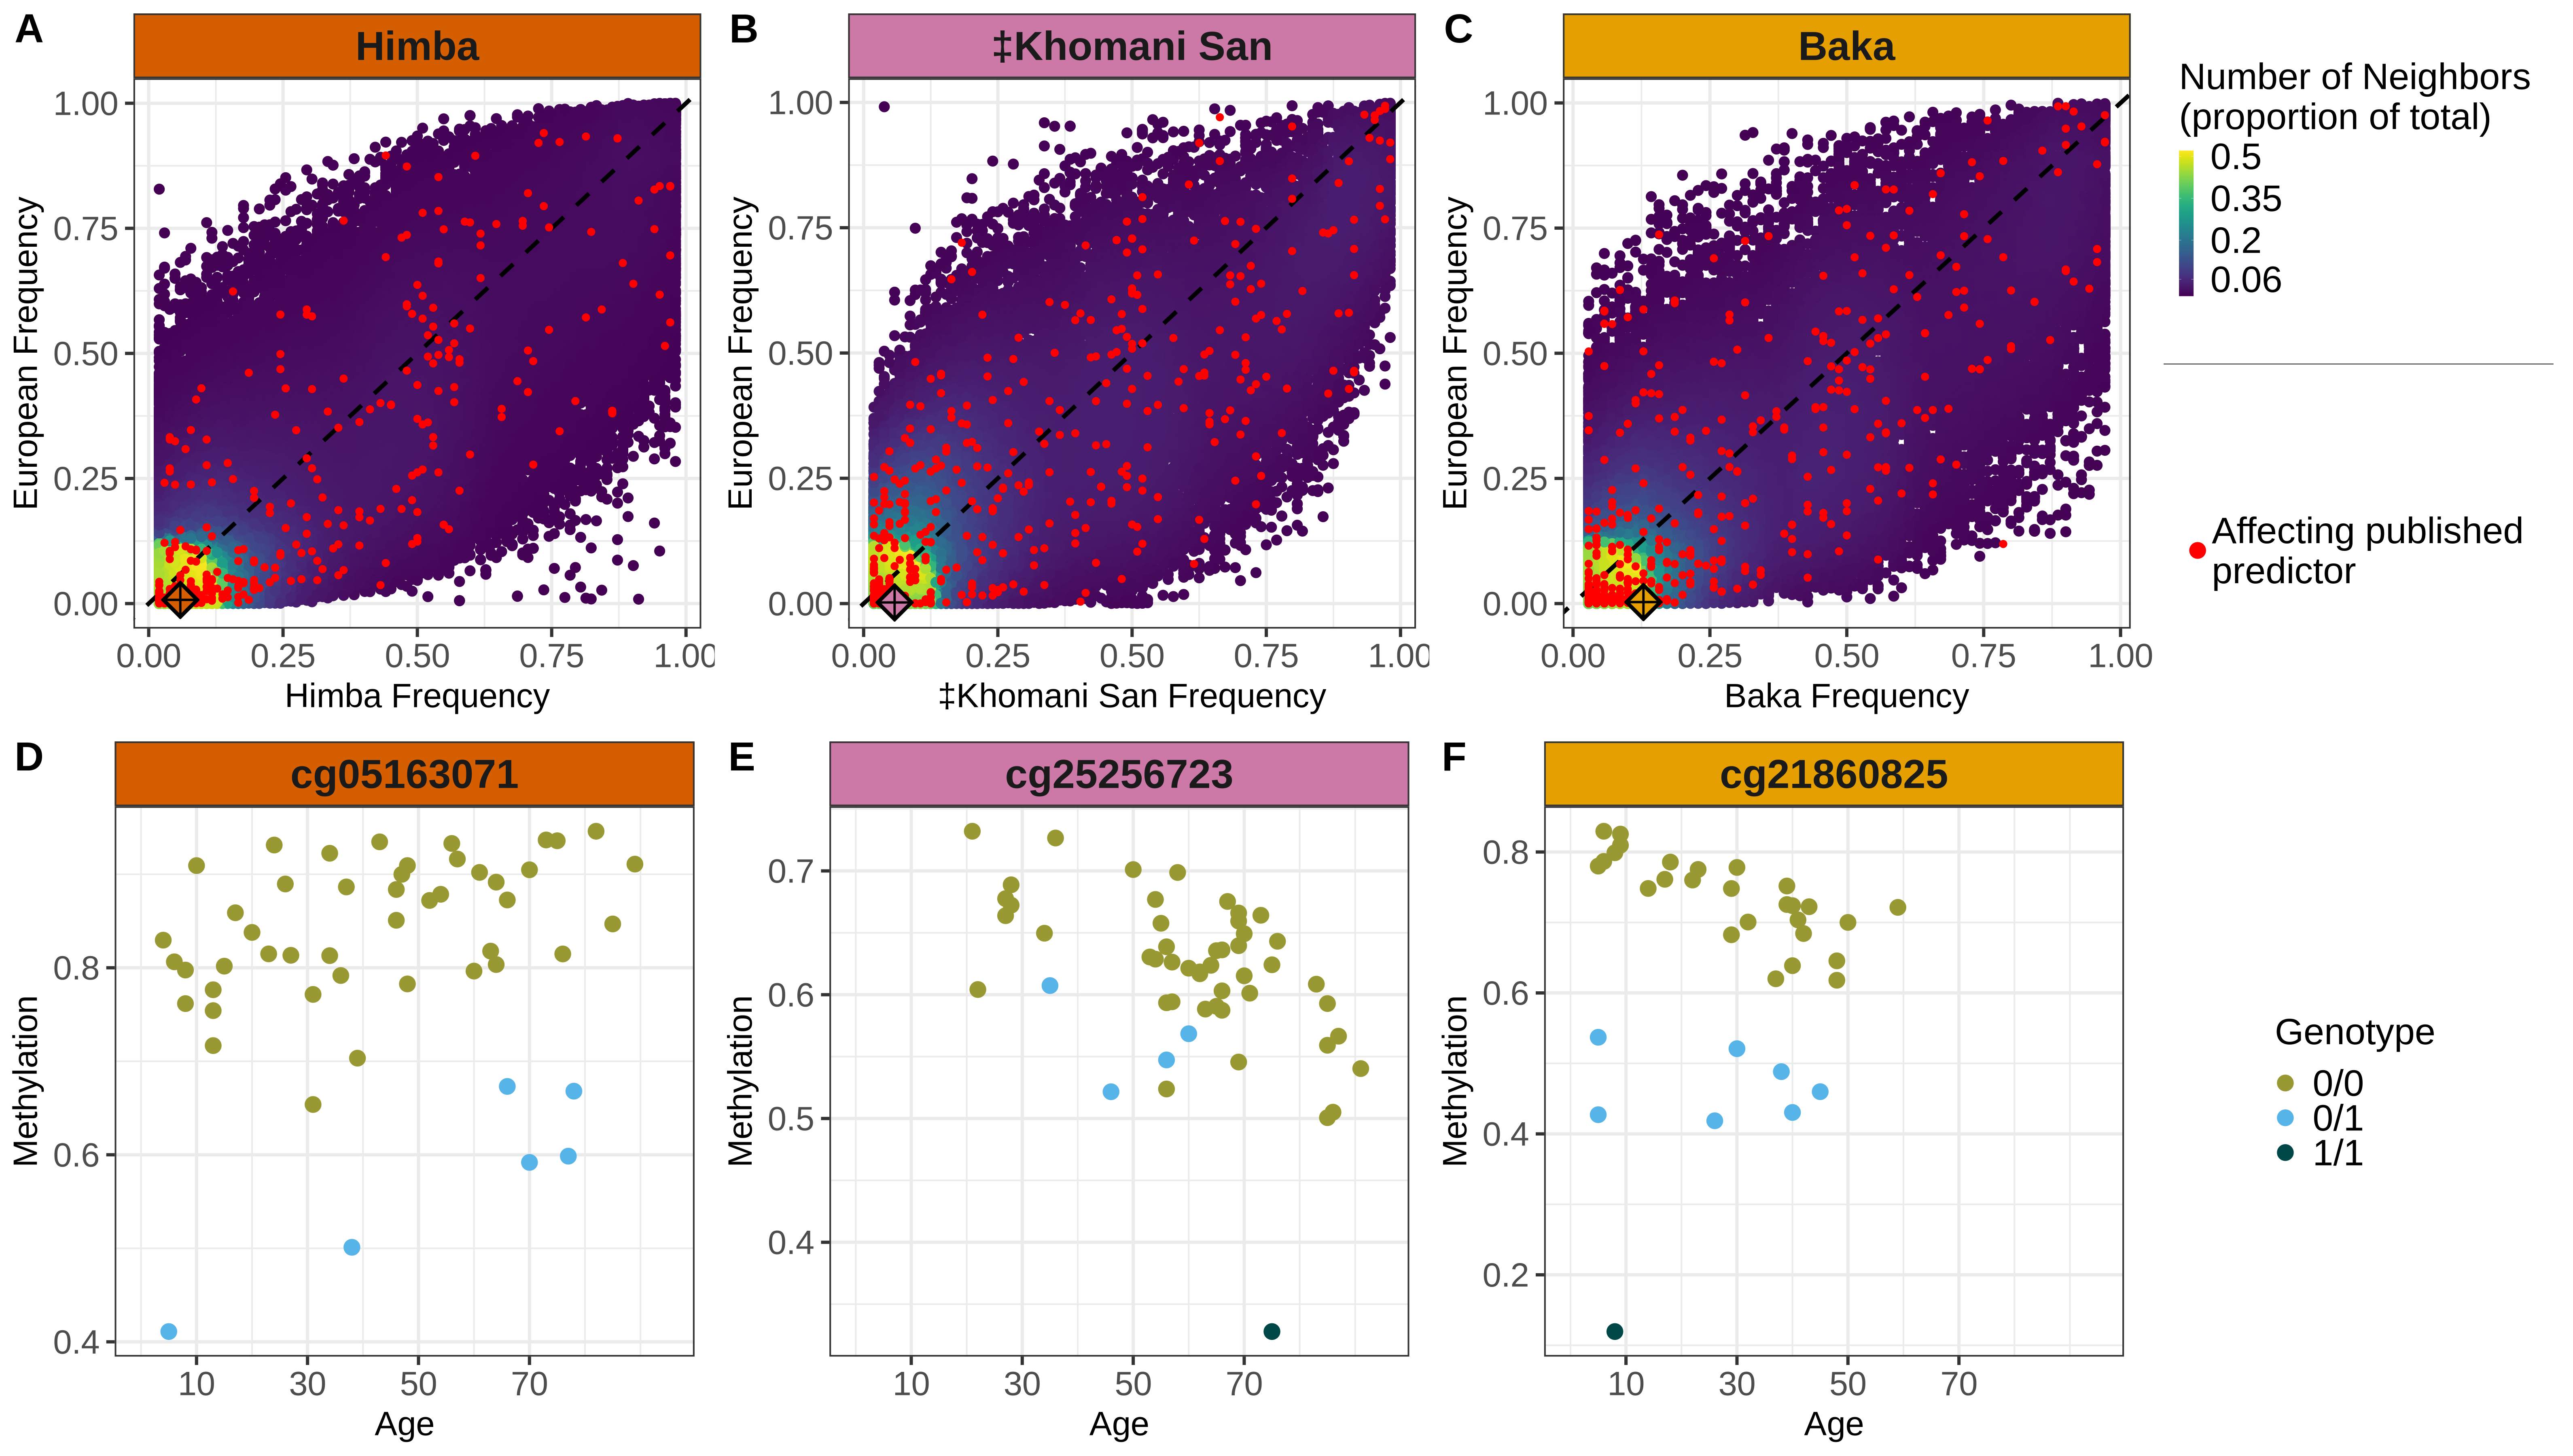

In [12]:
# Define fake legend data

# Extract legends from the right-most plots
legend_A_C <- get_legend(plot1)
legend_B <- get_legend(plot2)
legend_C <- get_legend(plot3)  # Get legend from the right-most plot in row A-C
legend_D_F <- get_legend(Baka_invariant)  # Get legend from the right-most plot in row D-F

# Define fake legend data
fake_legend_data <- data.frame(
  x = c(0), 
  y = c(0), 
  V7 = factor(c("Affecting published\npredictor"), levels = c("Affecting published\npredictor", "0/1", "1/1"))  # Ensure levels match
)

# Define color mapping for the legend (same as in the original plot)
legend_colours <- c("Affecting published\npredictor" = "red", "0/1" = "#56B4E8", "1/1" = "#004848")

# Create a plot for the fake legend with matching aesthetics
fake_legend_plot <- ggplot(fake_legend_data, aes(x = x, y = y, colour = V7)) +
  geom_point(size = 11) +  # Match the point size
  scale_colour_manual(values = legend_colours, name = NULL) +  # Match the color scale and legend title
  theme_void() +  # Remove all unnecessary plot elements
  theme(
    legend.position = "right",  # Positioning legend to the right
    legend.box.margin = margin(0, 10, 0, 0),
    legend.text = element_text(size = 55),  # Adjust font size for visibility
    legend.title = element_text(size = 55)  # Ensure the title is large enough
  )

# Extract the legend
fake_legend <- get_legend(fake_legend_plot)
# Vertical line
horiz_line <- ggplot() + 
  geom_segment(aes(x = 0, y = 0, xend = 1, yend = 0), color = "black", size = 0.5) + 
  theme_void()

# Combine legends side by side with a vertical line in between
legends_combined <- plot_grid(legend_A_C,
  horiz_line,   # Vertical line between the legends
  fake_legend,
  ncol = 1,        # Set ncol to 1 for legends on top of each other
  align = 'v',     # Align vertically to ensure proper alignment
  axis = 'tb',     # Align the axis from top to bottom
  rel_heights = c(1, 0.05, 1)  # Adjust relative heights for the legends and the line
)


# # Remove legends from individual plots 
plot1 <- plot1 + theme(legend.position = "none")
plot2 <- plot2 + theme(legend.position = "none")
plot3 <- plot3 + theme(legend.position = "none")
Himba_invariant <- Himba_invariant + theme(legend.position = "none")
Khomani_invariant <- Khomani_invariant + theme(legend.position = "none")
Baka_invariant <- Baka_invariant + theme(legend.position = "none")

# Combine plots in rows without legends
combined_plots_A_C <- plot_grid(plot3, plot2, plot1, nrow = 1, labels = c("A", "B", "C"), rel_widths = c(1, 1, 1), label_size = 60)
combined_plots_D_F <- plot_grid(Himba_invariant, Khomani_invariant, Baka_invariant, nrow = 1, labels = c("D", "E", "F"), rel_widths = c(1, 1, 1), label_size = 60)

# Combine the two rows together, and add the legends to the right end of each row
final_plot <- plot_grid(
  combined_plots_A_C, legends_combined,
  combined_plots_D_F, legend_D_F, 
  nrow = 2, 
  #rel_heights = c(1, 0.1),  # Adjust relative height to accommodate legend
  rel_widths = c(1, 0.2),   # Adjust relative width for legend
  labels = NULL
)
options(repr.plot.width = 53, repr.plot.height = 30)

# Show the final combined plot
final_plot